In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import contextily as cx
import hamhelper.colours as hc
import hamhelper.plotting as hp
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import geopandas as gpd
from math import trunc

# Define helper functions
def get_lat_lon(df, col='geo_point_2d'):
    loc = df[col].to_numpy()
    latitudes = np.empty_like(loc)
    longitudes = np.empty_like(loc)
    for _, entry in enumerate(loc[::]):
        lat, lon = entry.split(', ')
        latitudes[_] = float(lat)
        longitudes[_] = float(lon)
    return latitudes, longitudes

# Making the Plot

### User Settings

In [45]:
# %----------------- User -----------------% 

# Indicator Settings
choropleth_indicator = 'Residents who meet the Canadian Physical Activity Guidelines'
year = '2014'
area_indicator = 'Local Area MHMC'

# Garden & food Trees Settings

# Plot Settings
colormap = 'ptol_sunset'
map_edge_padding = 0.005
map_style = 'terrain'  # 'toner' or 'terrain'
plot_size = np.array([3.3, 2.2])*4


### Load the Data

In [46]:
# Load in data: INDICATORS
df_geo = gpd.read_file(r"data\indicator-data.geojson")

# Select data
selection_type = [choropleth_indicator]
selection_year = [year]
selection_survey = [area_indicator]

selected_data = df_geo[df_geo['indicatorname'].isin(selection_type)]
selected_data = selected_data[selected_data['periodlabel'].isin(selection_year)]
selected_data = selected_data[selected_data['geolevelname'].isin(selection_survey)]

geom = selected_data.loc[:, 'geometry'].to_numpy()
val = selected_data.loc[:, 'actualvalue'].to_numpy()
geoName = selected_data.loc[:, 'geographyname'].to_numpy()

geoGeom = gpd.GeoSeries(geom)

# Load in data: Gardens
garden_file = r'data\community-gardens-and-food-trees.csv'
df = pd.read_csv(garden_file, delimiter=';').iloc[1: , :]  # drop first row of all NaNs for pre 2010 private entries
lat, lon = get_lat_lon(df,)

trees= df['NUMBER_OF_FOOD_TREES'].to_numpy()
trees = np.where(trees == 'yes', 1, trees).astype(float)
trees = np.where(np.isnan(trees), -40, trees)

plots = df['NUMBER_OF_PLOTS'].to_numpy()
plots = np.where(np.isnan(plots), -40, plots)

# define custom colormap for values that shouldnt be less than zero
# hmap = hc.HamColour.from_hex('red', ['#EE4B2B', '#EE4B2B']);
# hmap += hc.HamColour.from_name('hot', length=256);


### Draw the Plot

ii [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] 11
[-123.310644, 49.152519000000005, -122.958937, 49.32545]
Killarney                              -> <class 'shapely.geometry.multipolygon.MultiPolygon'>  = 35.0%
UBC                                    -> <class 'shapely.geometry.polygon.Polygon'>            = 39.0%
Shaughnessy/Arbutus-Ridge/Kerrisdale   -> <class 'shapely.geometry.multipolygon.MultiPolygon'>  = 47.0%
Kitsilano                              -> <class 'shapely.geometry.polygon.Polygon'>            = 58.0%
Renfrew-Collingwood                    -> <class 'shapely.geometry.polygon.Polygon'>            = 36.0%
Grandview-Woodland                     -> <class 'shapely.geometry.polygon.Polygon'>            = 45.0%
Mount Pleasant                         -> <class 'shapely.geometry.polygon.Polygon'>            = 52.0%
Sunset                                 -> <class 'shapely.geometry.polygon.Polygon'>            = 41.0%
South Cambie/Oakridge                  -> <class 'shapely.g

c:\Users\hamis\OneDrive - Simon Fraser University (1sfu)\SFU Coding\CMNS 313\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
c:\Users\hamis\OneDrive - Simon Fraser University (1sfu)\SFU Coding\CMNS 313\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


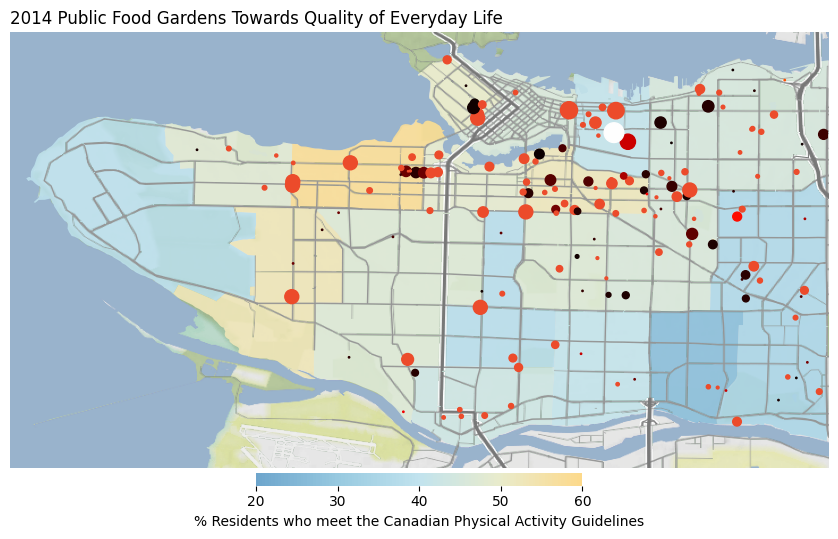

In [47]:
# %------------------------------------------------------------------------------------------------------%
fig, ax = plt.subplots(1, 1, figsize = plot_size)
colors = hc.HamColour.from_name(colormap)

# make map
extent = geoGeom.geometry.total_bounds
west, south, east, north = extent
van_img, van_ext = cx.bounds2img(west, south, east, north, ll=True, source=
                                 fr'https://tiles.stadiamaps.com/tiles/stamen_{map_style}'+r'_background/{z}/{x}/{y}{r}.png?api_key=0c79f47c-8641-4ae2-9856-ffbb3c3b6ac4')
van_img_roads, van_ext_txt_roads = cx.bounds2img(west, south, east, north, ll=True, source=
                                                 fr' https://tiles.stadiamaps.com/tiles/stamen_{map_style}'+r'_lines/{z}/{x}/{y}{r}.png?api_key=0c79f47c-8641-4ae2-9856-ffbb3c3b6ac4')
van_img_txt, van_ext_txt = cx.bounds2img(west, south, east, north, ll=True, source=
                                         fr'https://tiles.stadiamaps.com/tiles/stamen_{map_style}'+r'_labels/{z}/{x}/{y}{r}.png?api_key=0c79f47c-8641-4ae2-9856-ffbb3c3b6ac4')


west += -0.0445
east += 0.064
north += 0.0301
south += -0.0472
print([west, south, east, north])
bbox = np.array([west, east, south, north])  # + np.array([-0.03, 0, 0, -0.005])
ax.imshow(van_img, zorder=1, extent=bbox)
ax.imshow(van_img_roads, zorder=10, extent=bbox)

totSize = val.size
hasGeom = np.zeros(val.shape)
for i, (g, v) in enumerate(zip(geom[::],val[::])):
    if type(g) != type(None):
        hasGeom[i] = 1
        print(f'{geoName[i]:<38} -> {str(type(g)):<53} = {v}%')
        gpd.GeoSeries(g).plot(ax = ax, color = colors(v/100), zorder = 2, alpha = 0.9)

val_limits = np.array([trunc(np.min(val)/10)*10, round(np.max(val),-1)])

print('g', val_limits)
cmappable = ScalarMappable(norm=Normalize(*val_limits), cmap=colors.truncate(val_limits[0]/100, val_limits[1]/100, update=False).cmap)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.05)
cb = plt.colorbar(cmappable, cax=cax, label = f'% {selection_type[0]}', orientation = 'horizontal', aspect=10)
cb.outline.set_visible(False)

# Add garden scatter
c = ax.scatter(lon[::], lat[::], s=plots + 1, c=np.where(trees >= 0, trees, -1), zorder = 100, cmap = hmap.cmap)

print('\nFILTERED TO:')
print(Q:=f"Quality: {selection_type[0]}")
print(Y:=f"Year: {selection_year[0]}")
print(S:=f"Survey: {selection_survey[0]}\n")
print(f'{np.sum(hasGeom):} out of {totSize} have a shape object!')


west, south, east, north = extent
borderPad = map_edge_padding
ax.set(xlim = [west-borderPad, east+borderPad*0], ylim = [south-borderPad, north+borderPad])
hp.despine(left=False, bottom=False, axis=ax)
ax.set(xticks=[], yticks=[])
ax.set_aspect(1.25)
cax.set_aspect(1.6)
cax.set(xticks=[20, 30, 40, 50, 60])
ax.set_title(f'{selection_year[0]} Public Food Gardens Towards Quality of Everyday Life', loc='left')

plt.savefig('plots/garden+indicator_plot.png', dpi=300, bbox_inches = 'tight')
plt.savefig('plots/garden+indicator_plot.pdf', dpi=300, bbox_inches = 'tight')